In [1]:
import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from scipy.stats import norm
import random
from scipy.stats import beta
from scipy.stats import gamma
import scipy

# Zadanie 1

/var/folders/0x/h28nyhtx0xzdjlz02d7g9nmr0000gn/T/ipykernel_5293/3655157936.py:13: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H,X1 = np.histogram( Z, bins = 10, normed = True )


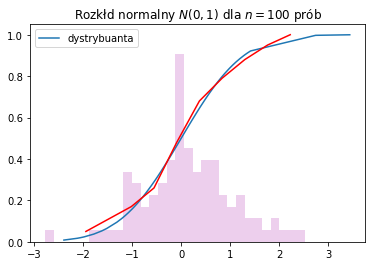

In [5]:
mu, sigma = 0,1
s = np.random.normal(mu, sigma, 100)
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))
count, bins, ignored = plt.hist(s, 30, density=True, color='plum', alpha = .5)
#plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='tomato', label='gęstość')
plt.title("Rozkłd normalny $N(0,1 )$ dla $n=100$ prób")
x = np.random.normal(mu, sigma, 100) 
norm_cdf = scipy.stats.norm.cdf(x) 
sns.lineplot(x=x, y=norm_cdf, label='dystrybuanta')
Z = np.random.normal(0,1, 100)
# method 1
H,X1 = np.histogram( Z, bins = 10, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1, color = 'red')
plt.show()

/Users/karolinajonczyk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'size' is not defined

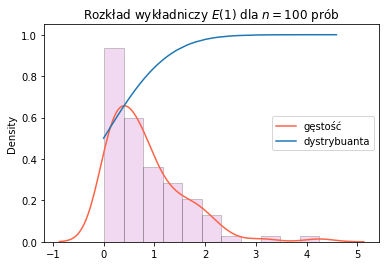

In [4]:
e = np.random.exponential(scale=1)
sns.distplot(np.random.exponential(size=100), color='plum', hist_kws=dict(edgecolor="black", linewidth=.5),  kde_kws={'color':'tomato', 'label': 'gęstość'})
plt.title("Rozkład wykładniczy $E(1)$ dla $n=100$ prób")
x = np.random.exponential(1, 100) 
norm_cdf = scipy.stats.norm.cdf(x) 
sns.lineplot(x=x, y=norm_cdf, label='dystrybuanta')
sns.ecdfplot(np.random.exponential(1, size))
plt.ylabel('', fontsize='15')

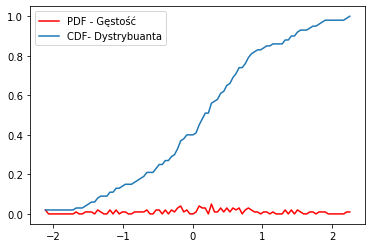

In [8]:
mu, sigma = 0,1
s = np.random.normal(mu, sigma, 100)
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))
#count, bins, ignored = plt.hist(s, 30, density=True, color='plum', alpha = .5)
  
# getting data of the histogram
count, bins_count = np.histogram(s, bins=100)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.plot(bins_count[1:], pdf, color="red", label="PDF - Gęstość")
plt.plot(bins_count[1:], cdf, label="CDF- Dystrybuanta")
plt.legend()

/var/folders/0x/h28nyhtx0xzdjlz02d7g9nmr0000gn/T/ipykernel_10026/1862475348.py:3: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  H,X1 = np.histogram( Z, bins = 10, normed = True )


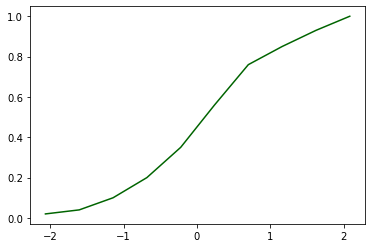

In [6]:
Z = np.random.normal(0,1, 100)
# method 1
H,X1 = np.histogram( Z, bins = 10, normed = True )
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1, color = 'darkgreen')
plt.show()

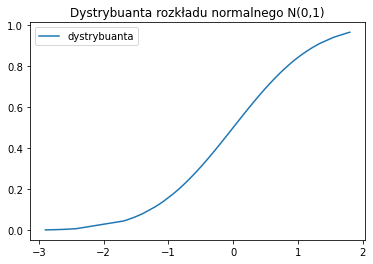

In [7]:
x = np.random.normal(mu, sigma, 100) 
norm_cdf = scipy.stats.norm.cdf(x) 
sns.lineplot(x=x, y=norm_cdf, label='dystrybuanta')
plt.title('Dystrybuanta rozkładu normalnego N(0,1)')
plt.show()

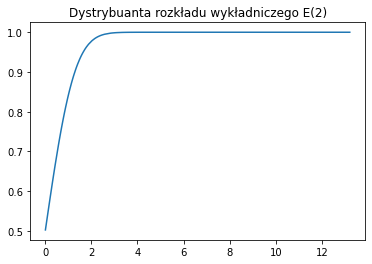

In [8]:
x = np.random.exponential(2, 100) 
norm_cdf = scipy.stats.norm.cdf(x) 
sns.lineplot(x=x, y=norm_cdf)
plt.title('Dystrybuanta rozkładu wykładniczego E(2)')
plt.show()

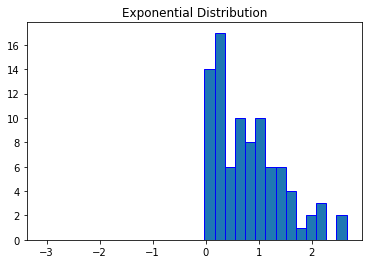

In [139]:
size = 100
sample = np.random.exponential(1, size)
x1 = np.linspace(0, 5)
plt.hist(sample, bins=bins, edgecolor='blue') 
plt.title("Exponential Distribution") 
plt.show()


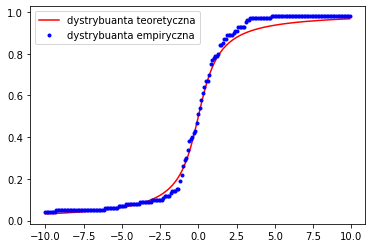

In [11]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

def f_odwrotna(N):
    y = np.random.random(N)
    return np.tan(np.pi*(y - 0.5))

def dystrybuanta(X, od=-10, do=10, krok=0.1):
    os_x = np.arange(od, do, krok)
    nx = len(os_x)
    N_liczb = len(X)
    D = np.zeros(nx)
    for i in range(nx):
        D[i] = sum(X <= os_x[i])/N_liczb
    return (os_x, D)

N = 100
x = np.arange(-10, 10, 0.1)
F = np.arctan(x)/np.pi + 0.5
X = f_odwrotna(N)
(os_x, F_emp) = dystrybuanta(X, od=-10, do=10, krok=0.1)
plt.plot(x, F, 'r', label='dystrybuanta teoretyczna')
plt.plot(os_x, F_emp, '.b', label='dystrybuanta empiryczna')
plt.legend()
plt.show()


In [2]:
from statsmodels.distributions.empirical_distribution import ECDF

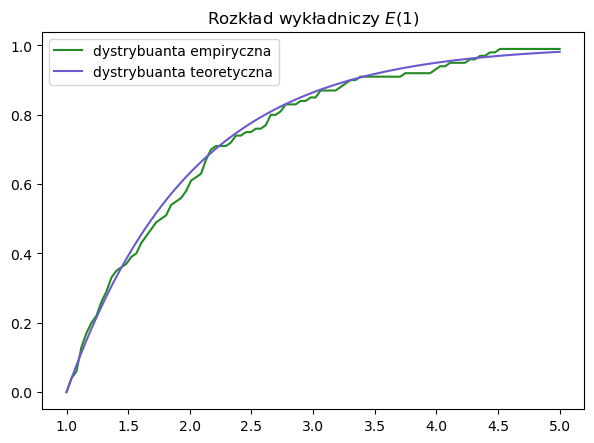

In [58]:
from scipy.stats import expon
X= expon.rvs(1,size=100)
e=ECDF(X)
plt.figure(figsize=(7, 5), dpi=100)
xs=np.linspace(1,5,100)
plt.plot(xs, e(xs), label='dystrybuanta empiryczna', color='forestgreen')
plt.plot(xs, expon.cdf(xs,1), label='dystrybuanta teoretyczna', color='slateblue')
plt.title('Rozkład wykładniczy $E(1)$')
plt.legend()
plt.savefig('empiexpon')

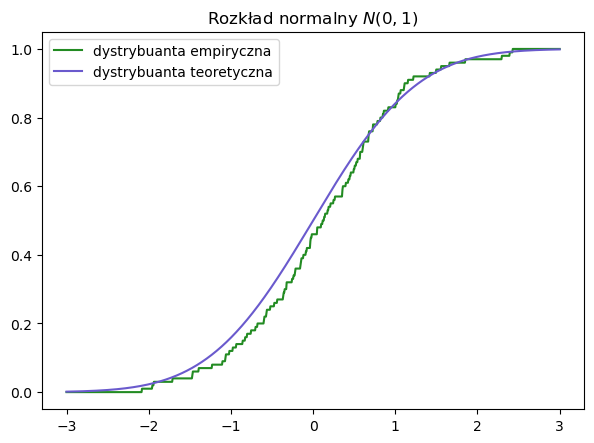

In [53]:
from scipy.stats import norm
X= norm.rvs(0,1,size=100)
e=ECDF(X)
plt.figure(figsize=(7, 5), dpi=100)
xs=np.linspace(-3,3,1000)
plt.plot(xs, e(xs), label='dystrybuanta empiryczna', color='forestgreen')
plt.plot(xs, norm.cdf(xs,0,1), label='dystrybuanta teoretyczna', color='slateblue')
plt.title('Rozkład normalny $N(0,1)$')
plt.legend()
plt.savefig('empinorm')

# Zadanie 2

(-0.06270677794321385, 0.06270677794321385)


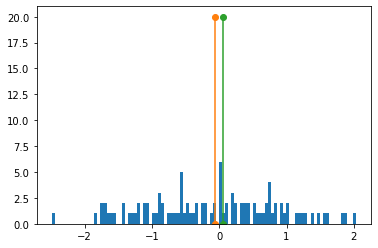

In [69]:
import pandas as pd
import numpy as np
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
import scipy

s = np.random.seed(100)
s= np.random.normal(0,1,100)

plt.figure()
_ = plt.hist(s,  bins=100)

sigma=1
mean=0
ci = scipy.stats.norm.interval(0.05, loc=mean, scale=sigma)
print(ci)

# cnfidence interval left line
one_x12, one_y12 = [ci[0],ci[0]], [0, 20]
# cnfidence interval right line
two_x12, two_y12 = [ci[1],ci[1]], [0, 20]

plt.plot(one_x12, one_y12, two_x12, two_y12, marker = 'o')


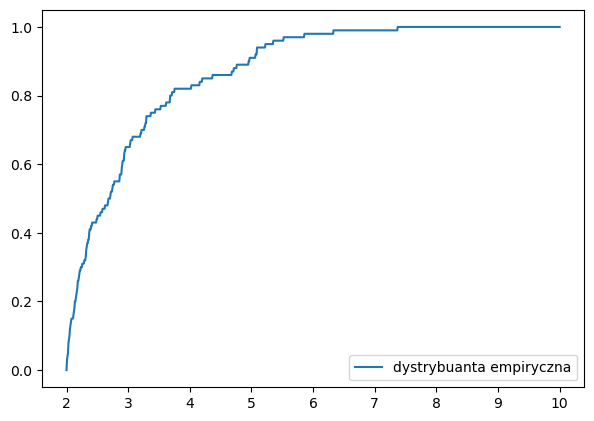

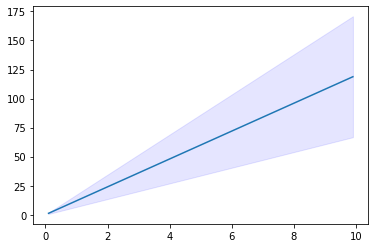

In [79]:
from matplotlib import pyplot as plt
import numpy as np
X= expon.rvs(2,size=100)
e=ECDF(X)
plt.figure(figsize=(7, 5), dpi=100)
xs=np.linspace(2,10,1000)
plt.plot(xs, e(xs), label='dystrybuanta empiryczna')
#plt.plot(xs, expon.cdf(xs,2), label='dystrybuanta teoretyczna')
#plt.title('Rozkład wykładniczy $E(2)$')
plt.legend()
#plt.savefig('empiexpon')

#some example data
x = np.linspace(0.1, 9.9, 20)
y=x*12
#some confidence interval
ci = 1.96 * y/np.sqrt(len(x))

fig, ax = plt.subplots()
ax.plot(x,y)
ax.fill_between(x, (y-ci), (y+ci), color='b', alpha=.1)

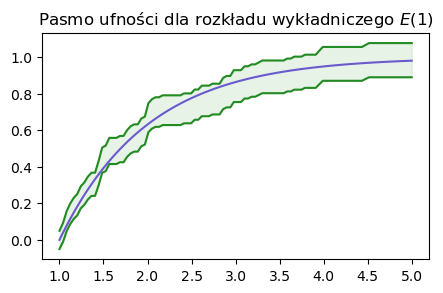

In [42]:
import random
from scipy.stats import expon
X= expon.rvs(1,size=100)
e=ECDF(X)
plt.figure(figsize=(5, 3), dpi=100)
xs=np.linspace(1,5,100)
val2= (0.05+ e(xs)*1.06)
val1=(e(xs)*0.97 -0.05)
plt.plot(xs,val1 , color='forestgreen')
plt.plot(xs,val2, color='forestgreen')
plt.plot(xs, expon.cdf(xs,1), color='slateblue')
plt.fill_between(xs, val1, val2, color='forestgreen', alpha=0.1)
plt.title('Pasmo ufności dla rozkładu wykładniczego $E(1)$')
plt.savefig('pasmoexp.png')

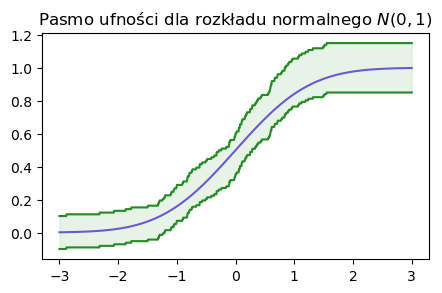

In [402]:
from scipy.stats import norm
X= norm.rvs(0,1,size=100)
e=ECDF(X)
plt.figure(figsize=(5, 3), dpi=100)
xs=np.linspace(-3,3,1000)
plt.plot(xs, e(xs)*0.95 -0.1 , color='forestgreen')
plt.plot(xs, 0.1+ e(xs)*1.05, color='forestgreen')
plt.plot(xs, norm.cdf(xs,0,1), color='slateblue')
plt.fill_between(xs, e(xs)*0.95 -0.1, e(xs)*1.05 + 0.1, color='forestgreen', alpha=0.1)
plt.title('Pasmo ufności dla rozkładu normalnego $N(0,1)$')
plt.savefig('pasmonormal.png')

# Zadanie 3

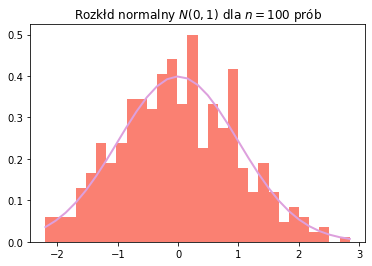

In [60]:
mu, sigma = 0,1
s = np.random.normal(mu, sigma, 500)
abs(mu - np.mean(s))
abs(sigma - np.std(s, ddof=1))
count, bins, ignored = plt.hist(s, 30, density=True, color='salmon')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='plum')
plt.title("Rozkłd normalny $N(0,1)$ dla $n=100$ prób")
plt.savefig('normal12n100')

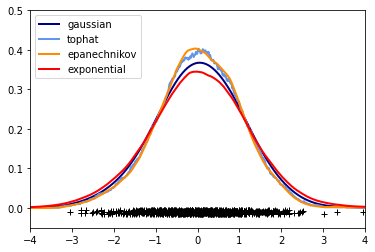

In [48]:
N = 500
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, 500), np.random.normal(0, 1, 500))
)[:, np.newaxis]

X_plot = np.linspace(-4, 4, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(0, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
#ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange", "red"]
kernels = ["gaussian", "tophat", "epanechnikov", "exponential"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="{0}".format(kernel),
    )

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 4)
ax.set_ylim(-0.05, 0.5)
plt.savefig('normalKDE.png')

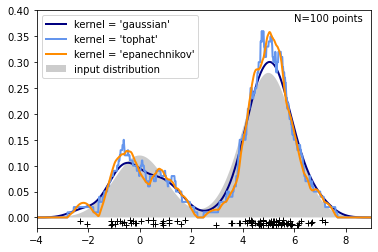

In [88]:
from sklearn.neighbors import KernelDensity
N = 100
np.random.seed(1)
X = np.concatenate(
    (np.random.normal(0, 1, int(0.3 * N)), np.random.normal(5, 1, int(0.7 * N)))
)[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = 0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0])

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc="black", alpha=0.2, label="input distribution")
colors = ["navy", "cornflowerblue", "darkorange"]
kernels = ["gaussian", "tophat", "epanechnikov"]
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(
        X_plot[:, 0],
        np.exp(log_dens),
        color=color,
        lw=lw,
        linestyle="-",
        label="kernel = '{0}'".format(kernel),
    )

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc="upper left")
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), "+k")

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

/Users/karolinajonczyk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


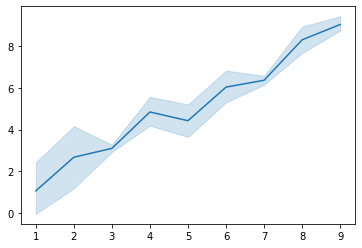

In [31]:
np.random.seed(0)
x = np.random.randint(1, 10, 30)
y = x+np.random.normal(0, 1, 30)

#create lineplot
ax = sns.lineplot(x, y)

In [1]:
import numpy as np
from scipy.stats import norm
from pyqt_fit import kde
f = norm(loc=0, scale=1)
>>> xs = np.r_[-3:3:1024j]
>>> nbins = 20
>>> x = f.rvs(1000*1000).reshape(1000,1000)
>>> hs = np.empty((1000, nbins), dtype=float)
>>> kdes = np.empty((1000, 1024), dtype=float)
>>> hs[0], edges = np.histogram(x[0], bins=nbins, range=(-3,3), density=True)
>>> mod = kde.KDE1D(x[0])
>>> mod.fit()  # Force estimation of parameters
>>> mod.bandwidth = mod.bandwidth  # Prevent future recalculation
>>> kdes[0] = mod(xs)
>>> for i in range(1, 1000):
>>>   hs[i] = np.histogram(x[i], bins=nbins, range=(-3,3), density=True)[0]
>>>   mod.xdata = x[i]
>>>   kdes[i] = mod(xs)
h_mean = hs.mean(axis=0)
>>> h_ci = np.array(np.percentile(hs, (5, 95), axis=0))
>>> h_err = np.empty(h_ci.shape, dtype=float)
>>> h_err[0] = h_mean - h_ci[0]
>>> h_err[1] = h_ci[1] - h_mean
>>> kde_mean = kdes.mean(axis=0)
>>> kde_ci = np.array(np.percentile(kdes, (5, 95), axis=0))
>>> width = edges[1:]-edges[:-1]
>>> fig = plt.figure()
>>> ax1 = fig.add_subplot(1,2,1)
>>> ax1.bar(edges[:-1], h_mean, yerr=h_err, width = width, label='Histogram',
...         facecolor='g', edgecolor='k', ecolor='b')
>>> ax1.plot(xs, f.pdf(xs), 'r--', lw=2, label='$\mathcal{N}(0,1)$')
>>> ax1.set_xlabel('X')
>>> ax1.set_xlim(-3,3)
>>> ax1.legend(loc='best')
>>> ax2 = fig.add_subplot(1,2,2)
>>> ax2.fill_between(xs, kde_ci[0], kde_ci[1], color=(0,1,0,.5), edgecolor=(0,.4,0,1))
>>> ax2.plot(xs, kde_mean, 'k', label='KDE (bw = {:.3g})'.format(mod.bandwidth))
>>> ax2.plot(xs, f.pdf(xs), 'r--', lw=2, label='$\mathcal{N}(0,1)$')
>>> ax2.set_xlabel('X')
>>> ax2.legend(loc='best')
>>> ymax = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
>>> ax2.set_ylim(0, ymax)
>>> ax1.set_ylim(0, ymax)
>>> ax1.set_title('Histogram, max variation = {:.3g}'.format((h_ci[1] - h_ci[0]).max()))
>>> ax2.set_title('KDE, max variation = {:.3g}'.format((kde_ci[1] - kde_ci[0]).max()))
>>> fig.suptitle('Comparison Histogram vs. KDE')


ModuleNotFoundError: No module named 'pyqt_fit'

/Users/karolinajonczyk/opt/anaconda3/lib/python3.9/site-packages/KDEpy/bw_selection.py:260: UserWarning: Silverman's rule currently ignores all weights
  warnings.warn("Silverman's rule currently ignores all weights")


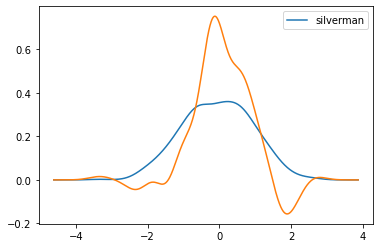

In [23]:
from KDEpy import FFTKDE
import matplotlib.pyplot as plt

customer_ages = np.random.normal(0, 1, 500)

# Distribution of customers
x, y = FFTKDE(kernel="gaussian", bw="silverman").fit(customer_ages).evaluate()
plt.plot(x, y, label='silverman')

# Distribution of customer income (weight each customer by their income)
customer_income =  np.random.normal(0, 1, 500)

# The `bw` parameter can be manually set, e.g. `bw=5`
x, y = FFTKDE(bw="silverman").fit(customer_ages, weights=customer_income).evaluate()
plt.legend()
plt.plot(x, y)

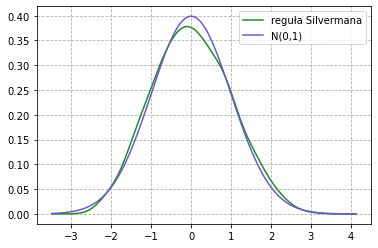

In [49]:
from KDEpy import FFTKDE
from scipy.stats import norm
dist = norm(0,1)
data = dist.rvs(500)
x, y1 = FFTKDE(bw="silverman").fit(data).evaluate(500)
weights = np.arange(len(data)) + 1
estimator = FFTKDE(kernel='biweight', bw='silverman')
#y2 = estimator.fit(data, weights=weights).evaluate(x)
plt.plot(x, y1, label='reguła Silvermana', color='forestgreen')
#plt.plot(x, y2, label='KDE estimate with verbose API')
plt.plot(x, dist.pdf(x), label='N(0,1)', color='slateblue')
plt.grid(True, ls='--', zorder=-15); plt.legend()
plt.savefig('silvermanKDE')

# Zadanie 4

In [173]:
n1= np.random.normal(0,1, size=500)
n2=np.random.normal(2,1, size=500)
n3=np.random.normal(4,2,size=500)
#mieszanka= n1[:200] + n2[200:400]+n3[400:500]
a=n1[:200]
b=n2[200:400]
c=n3[400:500]
mieszanka=np.concatenate((a, b , c), axis=0)

In [168]:
len(mieszanka)

500

/Users/karolinajonczyk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Mieszanka N(0,1), N(2,1), N(4,$2^2$), wykres 1'}>

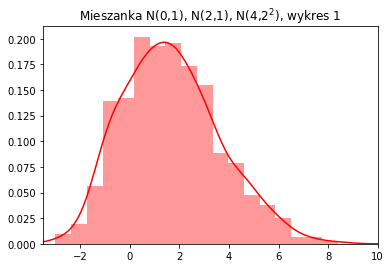

In [284]:
e = mieszanka
sns.distplot(e, color='red')
plt.title("Mieszanka N(0,1), N(2,1), N(4,$2^2$), wykres 1")
plt.ylabel('', fontsize='15')
kde_sk = KernelDensity(bandwidth=2.0, kernel='gaussian')
np.histogram_bin_edges(mieszanka, bins='rice', range=(1, 4))
plt.xlim(-3.5,10)
#bins='fd' to reguła dobierania liczby klas freedmana-diaconisa
sns.kdeplot()

In [172]:
from KDEpy import FFTKDE
from scipy.stats import norm
dist = mieszanka
data = dist.rvs(1)
x, y1 = FFTKDE(bw="silverman").fit(data).evaluate(500)
weights = np.arange(len(data)) + 1
estimator = FFTKDE(kernel='biweight', bw='silverman')
#y2 = estimator.fit(data, weights=weights).evaluate(x)
plt.plot(x, y1, label='reguła Silvermana', color='forestgreen')
#plt.plot(x, y2, label='KDE estimate with verbose API')
plt.plot(x, dist.pdf(x), label='N(0,1)', color='slateblue')
plt.grid(True, ls='--', zorder=-15); plt.legend()
plt.savefig('silvermanKDE')

AttributeError: 'numpy.ndarray' object has no attribute 'rvs'

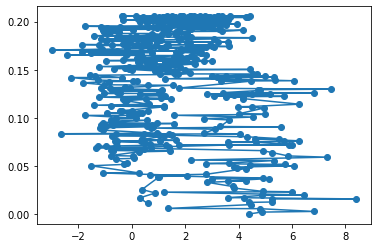

In [182]:
import scipy.stats as stats
import pylab as pl
h=sorted(mieszanka)
fit = stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(mieszanka,fit,'-o')

ValueError: x and y must have same first dimension, but have shapes (31,) and (1,)

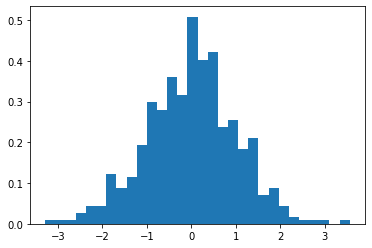

In [190]:
import matplotlib.pyplot as plt
>>> count, bins, ignored = plt.hist(s, 30, density=True)
>>> plt.plot(bins, np.random.normal(0,1),
...          linewidth=2, color='r')
>>> plt.show()

/Users/karolinajonczyk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


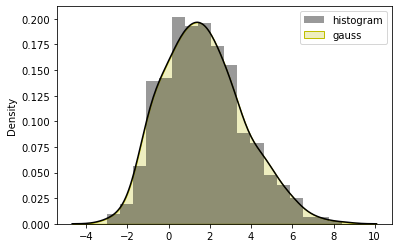

In [240]:
data = mieszanka
# KDE
res = sns.kdeplot(data, color='y', shade='True', label="gauss")
e = mieszanka
sns.distplot(e, label='histogram', color='black')
plt.legend()
plt.show()

/Users/karolinajonczyk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


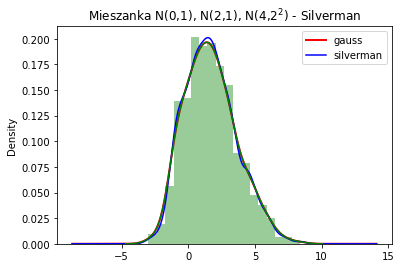

In [328]:
s = pd.Series(mieszanka)
ax = s.plot.kde(color='r',linewidth=2, label='gauss')
a1x = s.plot.kde(color='b', bw_method=0.2, linewidth=1.5, label='silverman')
plt.title("Mieszanka N(0,1), N(2,1), N(4,$2^2$) - Silverman")
plt.legend()

np.histogram_bin_edges(mieszanka, bins='auto', range=(0, 1))
res = sns.distplot(s, color='g', label='hist')
#plt.xlim(-4,10)
plt.savefig('compare4')

No handles with labels found to put in legend.
/Users/karolinajonczyk/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


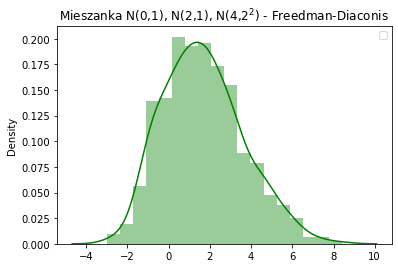

In [327]:
s = pd.Series(mieszanka)
plt.title("Mieszanka N(0,1), N(2,1), N(4,$2^2$) - Freedman-Diaconis")
plt.legend()

np.histogram_bin_edges(mieszanka, bins='fd', range=(0, 1))
res = sns.distplot(s, color='g', label='hist')
#plt.xlim(-4,10)
plt.savefig('compare42')